In [ ]:
# %%
#! python3
#
# Lending Club Case Study
# In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
#
#
#

In [66]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Set the data file name
data_file_name = "loan.csv"
raw_data_df = pd.read_csv(data_file_name, low_memory=False)

raw_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [49]:
# Check the number of rows and columns
raw_data_df.shape

(39717, 111)

In [50]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Cleaning data for analysis

In [51]:
# Clean data for analysis
raw_data_df["term"] = raw_data_df["term"].str.replace("months", "")
raw_data_df["int_rate"] = raw_data_df["int_rate"].str.replace("%", "")
raw_data_df["revol_util"] = raw_data_df["revol_util"].str.replace("%", "")
raw_data_df["emp_length"] = raw_data_df["emp_length"].str.replace("< ", "").str.replace("+ years","").str.replace(" years","").str.replace("year","")
raw_data_df["emp_length"] = raw_data_df["emp_length"].str.replace("+s", "").str.replace("s","")
raw_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [52]:
junk_char = ['+',' ']
raw_data_df[raw_data_df["emp_length"].isin(junk_char)]

raw_data_df["emp_length"].str.find("+")

raw_data_df["emp_length"]

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: object

In [210]:
# Convert the cleaned up columns into numbers
raw_data_df.term = raw_data_df.term.astype(float)
raw_data_df.int_rate = raw_data_df.int_rate.astype(float)
raw_data_df.revol_util = raw_data_df.revol_util.astype(float)
raw_data_df.emp_length = raw_data_df.emp_length.astype(float)
raw_data_df.annual_inc = raw_data_df.annual_inc.astype(int)
raw_data_df.loan_amnt = raw_data_df.loan_amnt.astype(int)
raw_data_df.funded_amnt = raw_data_df.funded_amnt.astype(int)
raw_data_df.last_pymnt_amnt = raw_data_df.last_pymnt_amnt.astype(int)

In [54]:
# Get the non numeric values in the annual income column
is_non_numeric = pd.to_numeric(raw_data_df['annual_inc'], errors='coerce').isnull() # errors=’coerce’ will replace all non-numeric values with NaN.
unique_non_numeric_values = raw_data_df[is_non_numeric]['annual_inc'].unique()
unique_non_numeric_values

array([], dtype=float64)

#### We do not find any non numeric character in the annual_inc column

In [105]:
# Segregate the columns to analyse into a smaller dataframe to focus on those
actual_data_df = raw_data_df[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_title','emp_length',
'home_ownership','annual_inc','verification_status','issue_d','loan_status','pymnt_plan','purpose','title',
'addr_state','dti','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc',
'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','policy_code','application_type']]


actual_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  float64
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  float64
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [ ]:
# We shall set the scientific display off and the precision to 2 decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [178]:
# Carve out the defaulters
default_df = raw_data_df[raw_data_df["loan_status"].isin(["Charged Off"])]

default_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60.0,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60.0,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
12,1064687,1298717,9000,9000,9000.0,36.0,13.49,305.38,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
14,1069057,1303503,10000,10000,10000.0,36.0,10.65,325.74,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,118823,118026,2500,2500,675.0,36.0,12.80,84.00,D,D4,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39668,118533,117783,2500,2500,825.0,36.0,9.64,80.26,B,B4,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39669,118523,118519,6500,6500,225.0,36.0,15.01,225.37,F,F1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39678,113179,113093,1000,1000,950.0,36.0,10.59,32.55,C,C2,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [182]:
# Get descriptive statistics of key columns of the defaulters
default_df[["loan_amnt", "funded_amnt", "term", "int_rate", "last_pymnt_amnt", "emp_length", "annual_inc"]].describe()


,loan_amnt,funded_amnt,term,int_rate,last_pymnt_amnt,emp_length,annual_inc
count,5627.00,5627.00,5627.00,5627.00,5627.00,5399.00,5627.00
mean,12104.39,11753.40,46.24,13.82,326.02,5.20,62427.30
std,8085.73,7760.52,11.87,3.65,528.98,3.45,47776.01
min,900.00,900.00,36.00,5.42,0.00,1.00,4080.00
25%,5600.00,5575.00,36.00,11.31,112.88,2.00,37000.00
50%,10000.00,10000.00,36.00,13.61,238.25,5.00,53000.00
75%,16500.00,16000.00,60.00,16.40,405.70,9.00,75000.00
max,35000.00,35000.00,60.00,24.40,12818.38,10.00,1250000.00


C:\Users\AbhijitRay\AppData\Local\Temp\ipykernel_23788\173351318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_df["annual_inc"] = default_df["annual_inc"].astype({'annual_inc': 'int32'})


1         30000
8         40000
9         15000
12        30000
14       100000
          ...  
39667     32000
39668     75000
39669    213000
39678     33990
39688    145000
Name: annual_inc, Length: 5627, dtype: int32

# Analysis using EDA

In [240]:
# Loan % defaults
print("Percentage of loan defaults: ", "{:.2f}".format(len(default_df)/len(raw_data_df) * 100))

Percentage of loan defaults:  14.17


#### The default % of loans is 14.17%

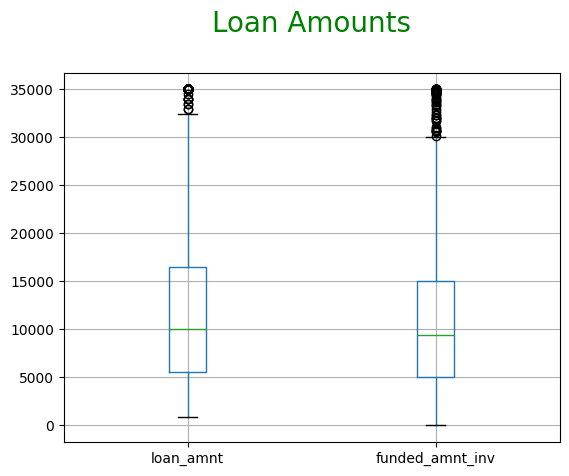

In [206]:
# Outlier Analysis of loan amounts
#plt.boxplot(default_df["loan_amnt"])


default_df.boxplot(column=['loan_amnt', 'funded_amnt_inv'])

# Adding and formatting title
plt.title("Loan Amounts\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

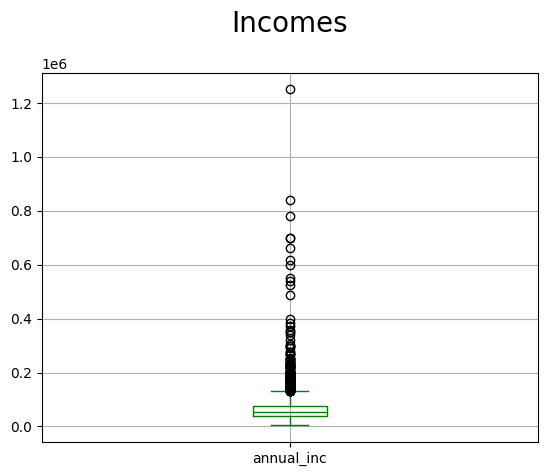

In [208]:
# Outlier Analysis of incomes to measure against a different scale
default_df.boxplot(column=['annual_inc'], color='green')

# Adding and formatting title
plt.title("Incomes\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

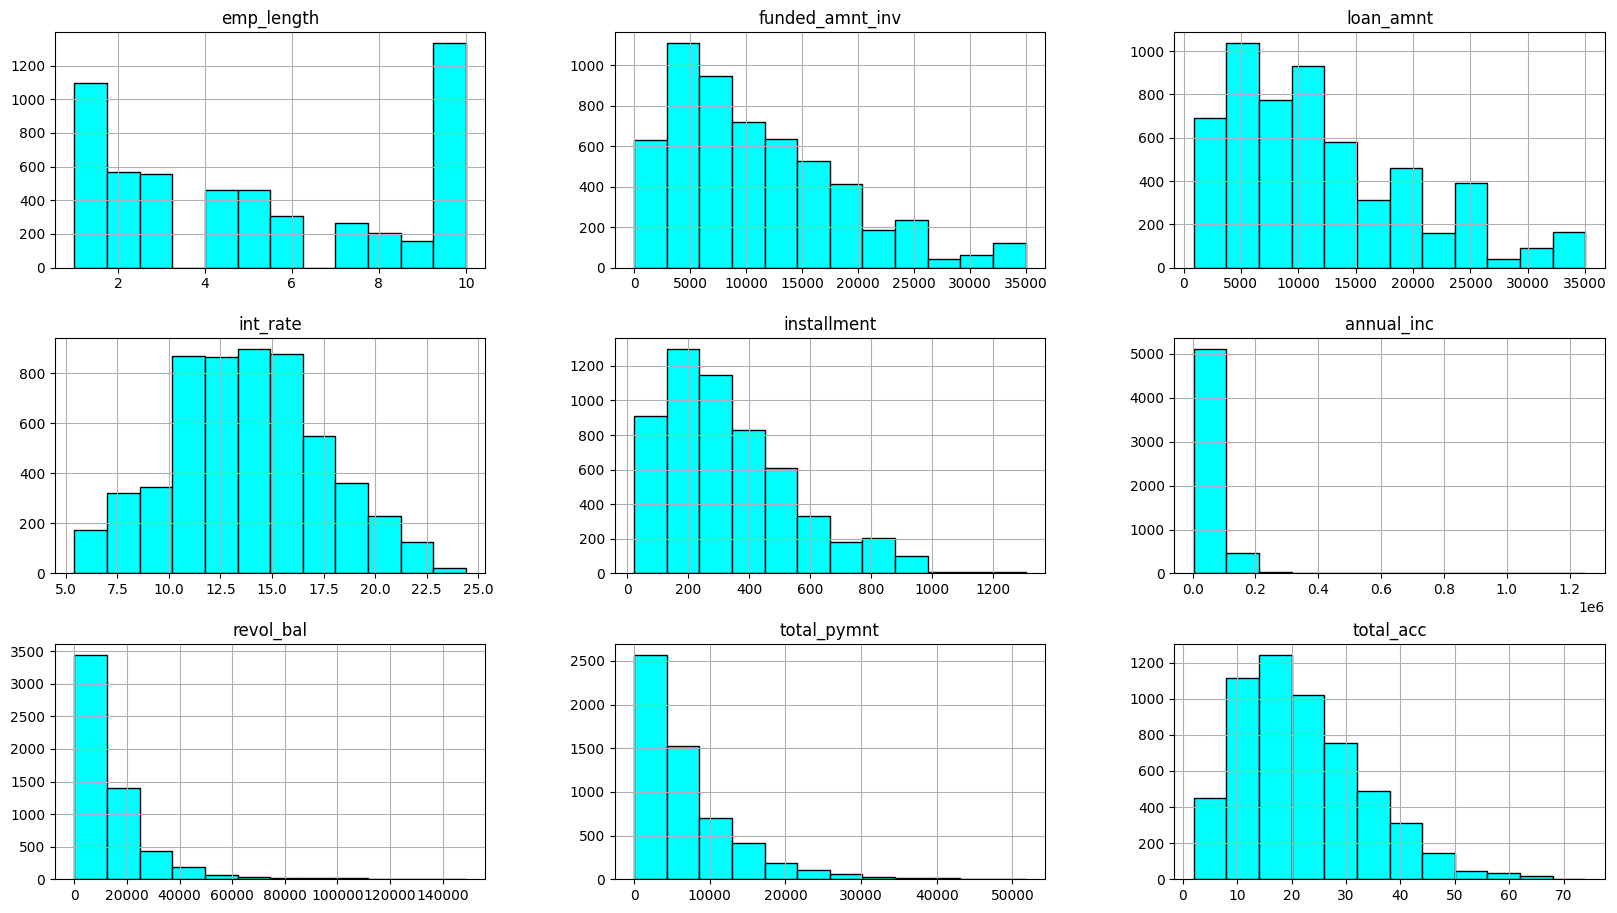

In [203]:
# Studying the financial metrics of all the defaulters
default_df[["emp_length", "funded_amnt_inv", "loan_amnt", "int_rate", "installment", "annual_inc", "revol_bal", "total_pymnt", "total_acc"]
           ].hist(color = 'cyan', edgecolor='Black', alpha = 1, bins=12, layout = (3,3), figsize = (20,11));

#### Indicators: 
#####    Defaulters usually work long i.e. 10 years or under 1 year.
#####    Defaulters' interest rates are mainly 10-16%
#####    Defaulters' mostly pay installments from 0 to 500


C:\Users\AbhijitRay\AppData\Local\Temp\ipykernel_23788\3677817282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_df[ "annual_inc"] = default_df[ "annual_inc"].astype('float')


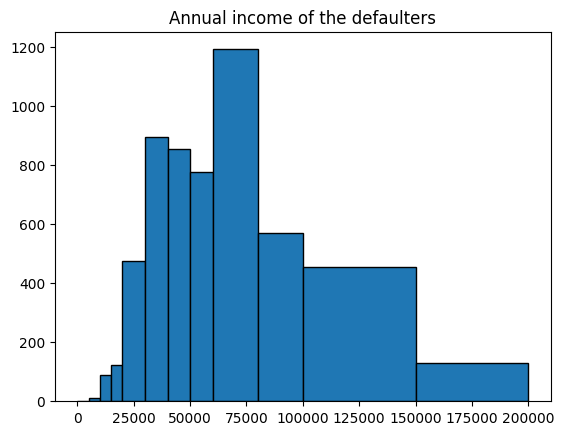

In [233]:
# Looking closely at the annual income column
default_df[ "annual_inc"] = default_df[ "annual_inc"].astype('float')
plt.hist(default_df["annual_inc"], edgecolor='Black', bins=[0, 5000, 10000, 15000, 20000, 30000, 40000, 50000, 60000, 80000, 100000, 150000, 200000] )
plt.title("Annual income of the defaulters")
plt.show()

##### Conclusion: Maximum defaulters earn between 60K and 80K. However we need to also consider those earning between 30K to 90K.

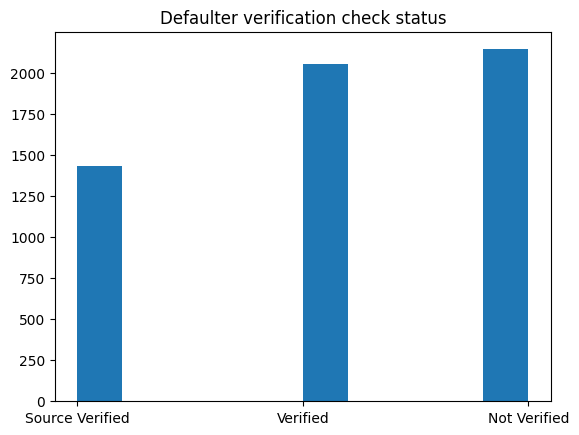

In [241]:
# Studying verification status
# plt.hist(default_df[["verification_status", "loan_status"]])
plt.hist(default_df[["verification_status"]])
plt.title("Defaulter verification check status")
plt.show()

<Axes: title={'center': 'Verification status'}>

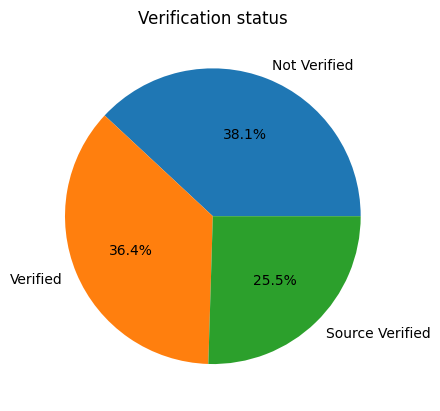

In [246]:
# Verification status as a pie

default_df["verification_status"].value_counts().plot.pie(y='Verification status', autopct='%1.1f%%', title="Verification status", ylabel="")


##### Conclusion: 38.1% of the defaulters, i.e. more than a 3rd of the defaulters have not been verified.

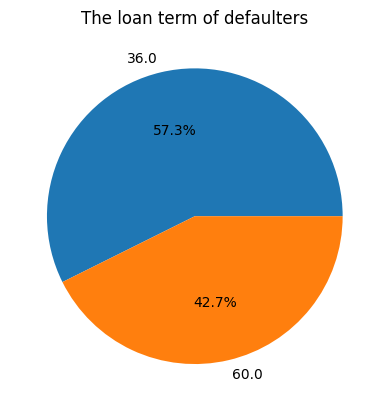

In [247]:
# Loan term taken by the defaulters
plt.title("The loan term of defaulters")
default_df["term"].value_counts().plot.pie(y='Loan terms', autopct='%1.1f%%', ylabel="")
plt.show();

##### Conclusion: Most of the defaulters have taken a loan for 36 months, although there is not much of a difference. So no major conclusion can be drawn with this metric

<Axes: title={'center': 'Loan reason'}>

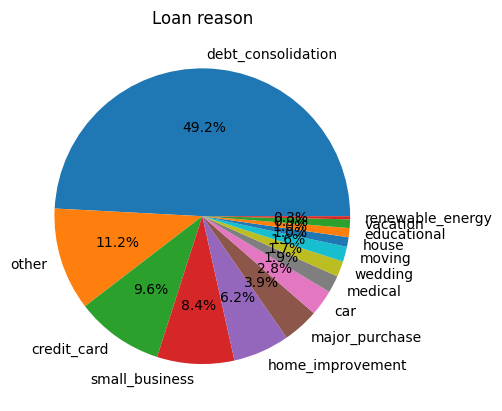

In [250]:
# Loan reason
default_df["purpose"].value_counts().plot.pie(y='Loan Reason', autopct='%1.1f%%', ylabel="", title='Loan reason')

##### Conclusion: Most of the defaulters (49.2%) have taken a loan for repaying other loans

<Axes: title={'center': "Defaulter's state of origin"}, ylabel='addr_state'>

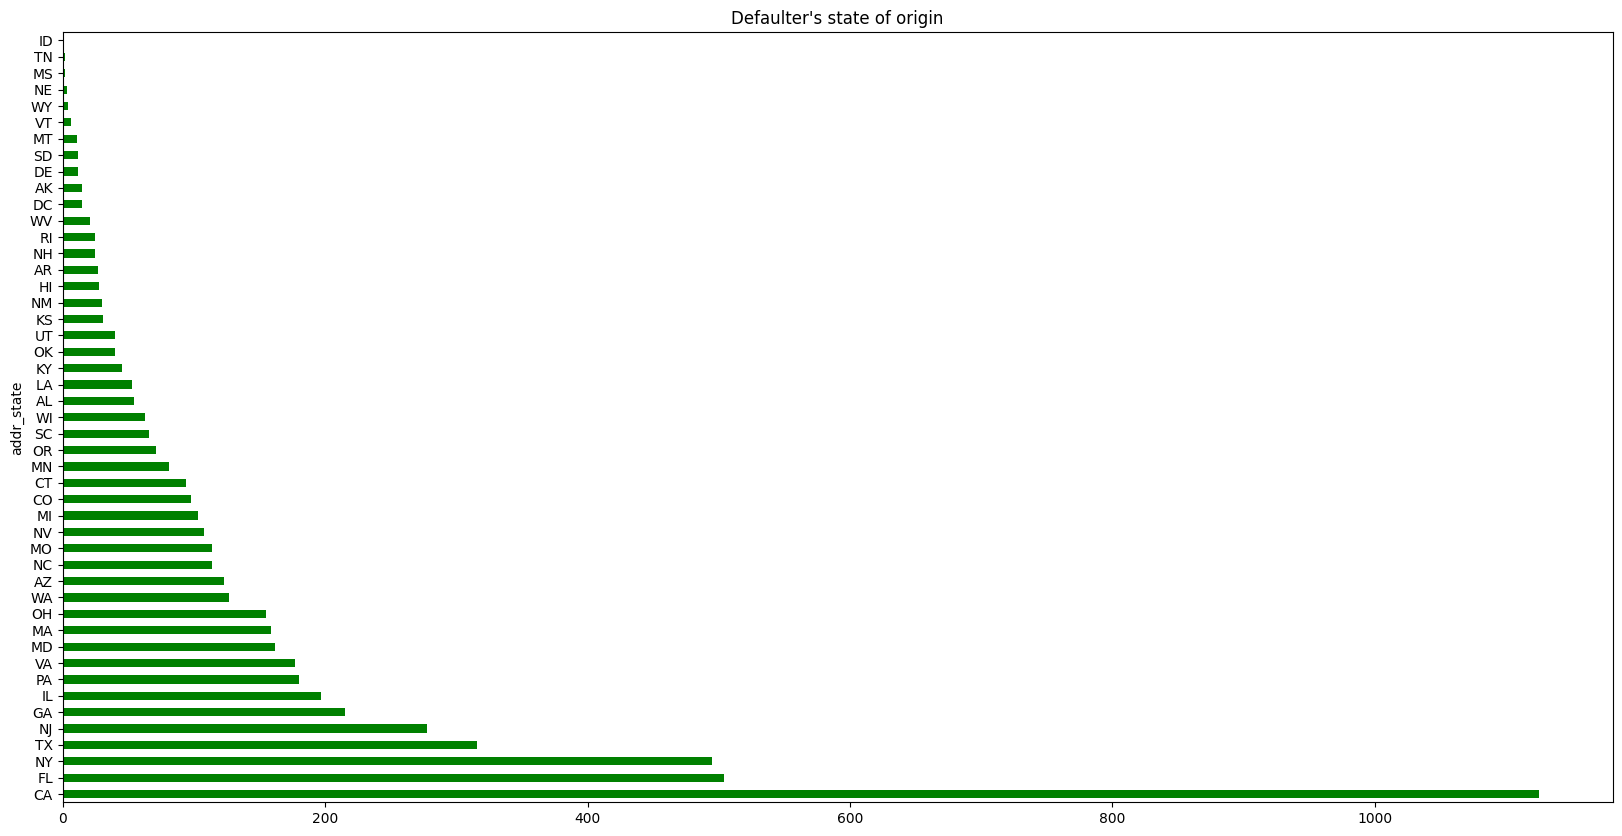

In [169]:
# Analyse the states of the defaulters
default_df["addr_state"].value_counts().plot.barh(x='States', y='Number', 
             title='Defaulter\'s state of origin', color='green', figsize=(20,10)) 

In [258]:
# Calculate the % of defaulters in the top 4 states
defaulters_4_states = len(default_df[(default_df["addr_state"] == "CA") | (default_df["addr_state"] == "FL") | (default_df["addr_state"] == "NY") | (default_df["addr_state"] == "TX")])
print("The percentage of defaulters in the top 4 states: ", "{:.2f}".format(defaulters_4_states/len(default_df) * 100))

The percentage of defaulters in the top 4 states:  43.36


##### Conclusion: Residents of CA, FL, NY, TX are the top 3 defaulting states.

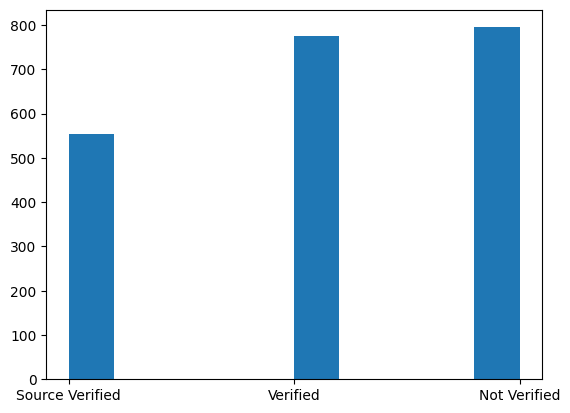

In [173]:
# Verification status
#defaulting_states_df = default_df["addr_state"].isin(["CA", "NY", "FL"])

plt.hist(default_df[(default_df["addr_state"] == "CA") | (default_df["addr_state"] == "NY") | (default_df["addr_state"] == "FL")].verification_status)
plt.show()

##### Conclusion: A high percentage of the defaulters are not verified. We shall now check for all the defaulters

<Axes: title={'center': 'Verification status of the top 4 states'}>

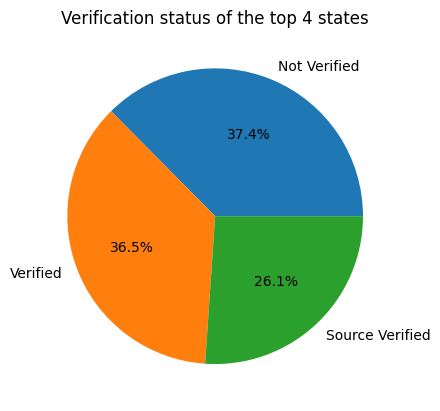

In [265]:
# Varification status in % of all defaulters in the 4 stats
default_df[(default_df["addr_state"] == "CA") | (default_df["addr_state"] == "NY") | (default_df["addr_state"] == "FL")].verification_status.value_counts().plot.pie(y='Verification status', autopct='%1.1f%%', title="Verification status of the top 4 states", ylabel="")
#default_df["verification_status"].value_counts().plot.pie(y='Verification status', autopct='%1.1f%%', ylabel="", title="Verification Status")

#### Conclusion: 38.1% of all the defaulters have not been verified at all